# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\MRINALINI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import data

In [2]:
data=pd.read_csv("penguins_size.csv")
df=pd.DataFrame(data)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

# Perform Exploratory Data Analysis

<AxesSubplot:xlabel='species', ylabel='count'>

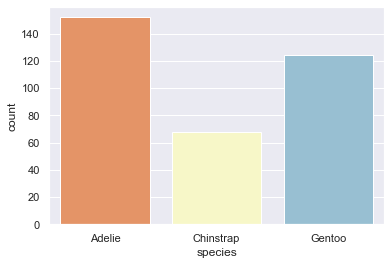

In [7]:
sns.countplot(df['species'],palette='RdYlBu')

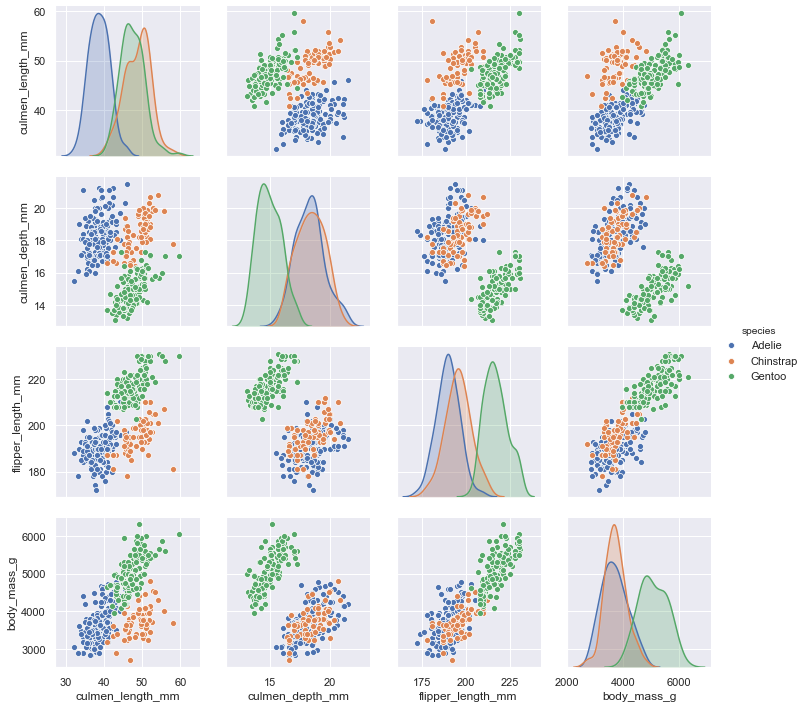

In [8]:
sns.pairplot(df,hue='species')

Lets explore our data through graphical representation!!!


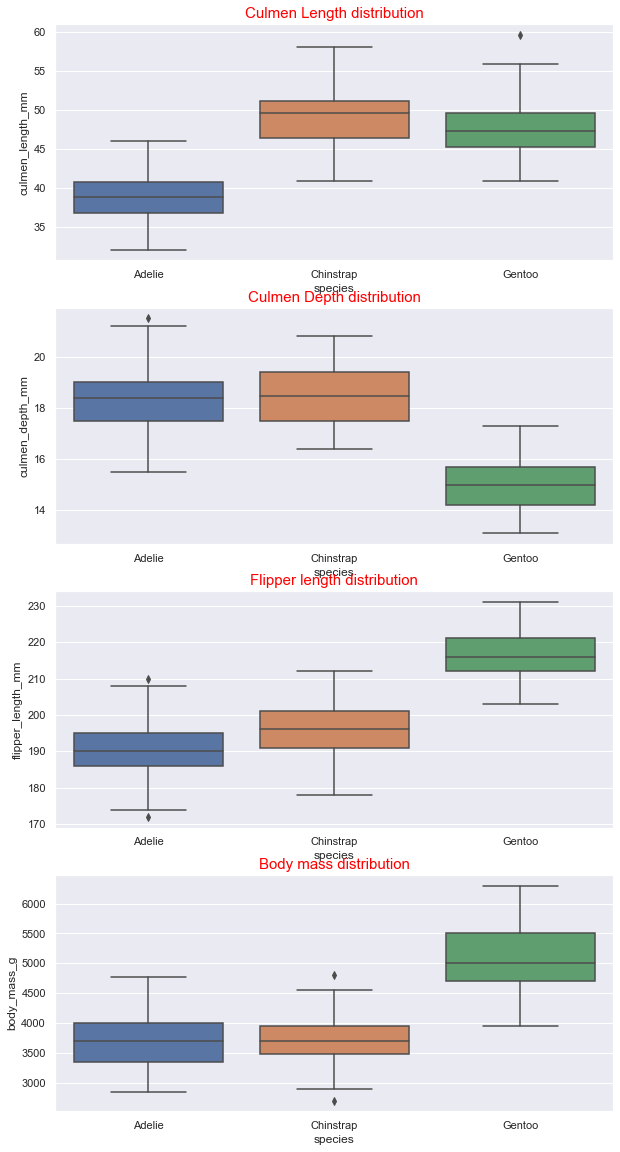

In [9]:
print("Lets explore our data through graphical representation!!!")
fig,axes=plt.subplots(4,1,figsize=(10,20))
sns.boxplot(x=data.species,y=data.culmen_length_mm,ax=axes[0])
axes[0].set_title("Culmen Length distribution",color='Red',fontsize=15)
sns.boxplot(x=data.species,y=data.culmen_depth_mm,ax=axes[1])
axes[1].set_title("Culmen Depth distribution",color='Red',fontsize=15)
sns.boxplot(x=data.species,y=data.flipper_length_mm,ax=axes[2])
axes[2].set_title("Flipper length distribution",color='Red',fontsize=15)
sns.boxplot(x=data.species,y=data.body_mass_g,ax=axes[3])
axes[3].set_title("Body mass distribution",color='Red',fontsize=15)
plt.show()

# Statistical Analysis

In [10]:
print("Mean of body mass of penguin:")
data.groupby(['species','sex']).mean()['body_mass_g'].round(2)

Mean of body mass of penguin:


species    sex   
Adelie     FEMALE    3368.84
           MALE      4043.49
Chinstrap  FEMALE    3527.21
           MALE      3938.97
Gentoo     .         4875.00
           FEMALE    4679.74
           MALE      5484.84
Name: body_mass_g, dtype: float64

In [11]:
#Working out with missing values
100*data.isnull().sum()/len(data) #Percentage of missing data

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [12]:
data['sex'].fillna(data['sex'].mode()[0],inplace=True)
col=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
for item in col:
    data[item].fillna(data[item].mean(),inplace=True)

In [13]:
100*data.isnull().sum()/len(data) #Successfully handled the missing values

species              0.0
island               0.0
culmen_length_mm     0.0
culmen_depth_mm      0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [14]:
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [15]:
data.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [16]:
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [17]:
data.loc[336,'sex']='FEMALE'

In [18]:
#Target variable encoding 
data['species']=data['species'].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
#Creating dummy variables
dummies=pd.get_dummies(data[['island','sex']],drop_first=True)
dummies

,island_Dream,island_Torgersen,sex_MALE
0,0,1,1
1,0,1,0
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
339,0,0,1
340,0,0,0
341,0,0,1
342,0,0,0


In [19]:
#Standarizing feature variables
df_scaled=data.drop(['island','sex'],axis=1)
df_scaled

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,39.10000,18.70000,181.000000,3750.000000
1,0,39.50000,17.40000,186.000000,3800.000000
2,0,40.30000,18.00000,195.000000,3250.000000
3,0,43.92193,17.15117,200.915205,4201.754386
4,0,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...,...
339,2,43.92193,17.15117,200.915205,4201.754386
340,2,46.80000,14.30000,215.000000,4850.000000
341,2,50.40000,15.70000,222.000000,5750.000000
342,2,45.20000,14.80000,212.000000,5200.000000


In [20]:
target=df_scaled.species
target

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [21]:
df_feat=df_scaled.drop('species',axis=1)
df_feat

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_feat)
dfscaledfl=scaler.transform(df_feat)
dfscaledfl=pd.DataFrame(dfscaledfl,columns=df_feat.columns[:4])
dfscaledfl

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...
339,1.307172e-15,1.806927e-15,0.000000,0.000000
340,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,2.351241e-01,-1.195816e+00,0.791756,1.250229


In [23]:
df_preprocessed=pd.concat([dfscaledfl,dummies,target],axis=1)
df_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0
...,...,...,...,...,...,...,...,...
339,1.307172e-15,1.806927e-15,0.000000,0.000000,0,0,1,2
340,5.294731e-01,-1.450118e+00,1.006038,0.811880,0,0,0,2
341,1.191758e+00,-7.380718e-01,1.506028,1.939064,0,0,1,2
342,2.351241e-01,-1.195816e+00,0.791756,1.250229,0,0,0,2


# K Means Clustering

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
kmeans=KMeans(3,init='k-means++')
kmeans.fit(df_preprocessed.drop('species',axis=1))

KMeans(n_clusters=3)

In [25]:
df_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0
...,...,...,...,...,...,...,...,...
339,1.307172e-15,1.806927e-15,0.000000,0.000000,0,0,1,2
340,5.294731e-01,-1.450118e+00,1.006038,0.811880,0,0,0,2
341,1.191758e+00,-7.380718e-01,1.506028,1.939064,0,0,1,2
342,2.351241e-01,-1.195816e+00,0.791756,1.250229,0,0,0,2


In [26]:
df_preprocessed.species

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [27]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
print(confusion_matrix(df_preprocessed.species,kmeans.labels_))

[[141   0  11]
 [  5   0  63]
 [  0 123   1]]


In [29]:
print(classification_report(df_preprocessed.species,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.00      0.00      0.00        68
           2       0.01      0.01      0.01       124

    accuracy                           0.41       344
   macro avg       0.33      0.31      0.32       344
weighted avg       0.43      0.41      0.42       344



In [30]:
print('Accuracy score:',np.round(100*accuracy_score(df_preprocessed.species,kmeans.labels_),2))

Accuracy score: 41.28


Text(0, 0.5, 'Within-cluster Sum of Squares')

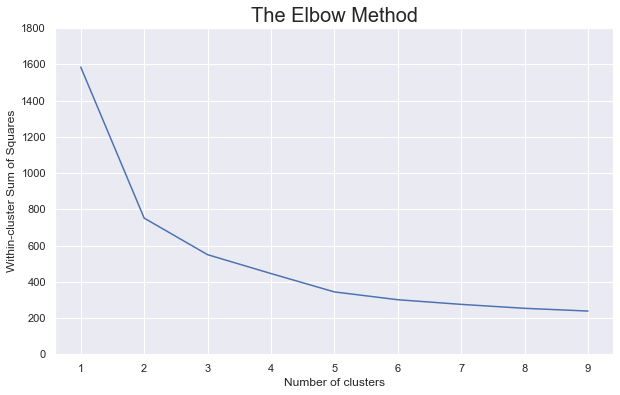

In [31]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(df_preprocessed.drop('species',axis=1))
    pred_i=kmeans.labels_
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.ylim([0,1800])
plt.title('The Elbow Method',{'fontsize':20})
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

# KNN

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(df_preprocessed.drop('species',axis=1),target,test_size=0.2)

In [34]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
predy=knn.predict(xtest)
predy

array([2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 2], dtype=int64)

In [35]:
print(confusion_matrix(ytest,predy))

[[35  0  0]
 [ 0 13  0]
 [ 1  0 20]]


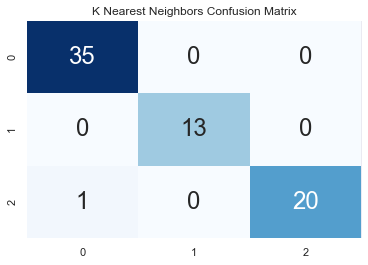

In [36]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(ytest,predy),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [37]:
print(classification_report(ytest,predy))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      1.00      1.00        13
           2       1.00      0.95      0.98        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.99        69
weighted avg       0.99      0.99      0.99        69



In [38]:
print(accuracy_score(ytest,predy))

0.9855072463768116


In [39]:
#Find the best value for k
errrate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    errrate.append(np.mean(pred_i!=ytest))

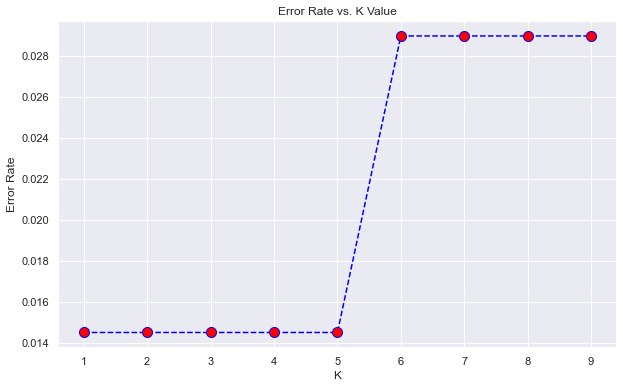

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),errrate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [42]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
predy = knn.predict(xtest)
print(confusion_matrix(ytest,predy))
print(classification_report(ytest,predy))

[[35  0  0]
 [ 1 12  0]
 [ 1  0 20]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.92      0.96        13
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69

